In [1]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
import pandas as pd
import numpy as np
from sklearn import tree

In [2]:
digits = datasets.load_digits()
X = digits.data
Y = digits.target

In [7]:
df = pd.DataFrame(X)
digits_encoded = pd.get_dummies(df)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df,pd.DataFrame(Y),test_size = 0.35,random_state = 43)

In [23]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion="gini",max_leaf_nodes=47)

In [24]:
DT.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=47)

In [25]:
DT.score(X_test,y_test)*100

85.05564387917329

In [26]:
targets_names = digits.target_names.astype(str)

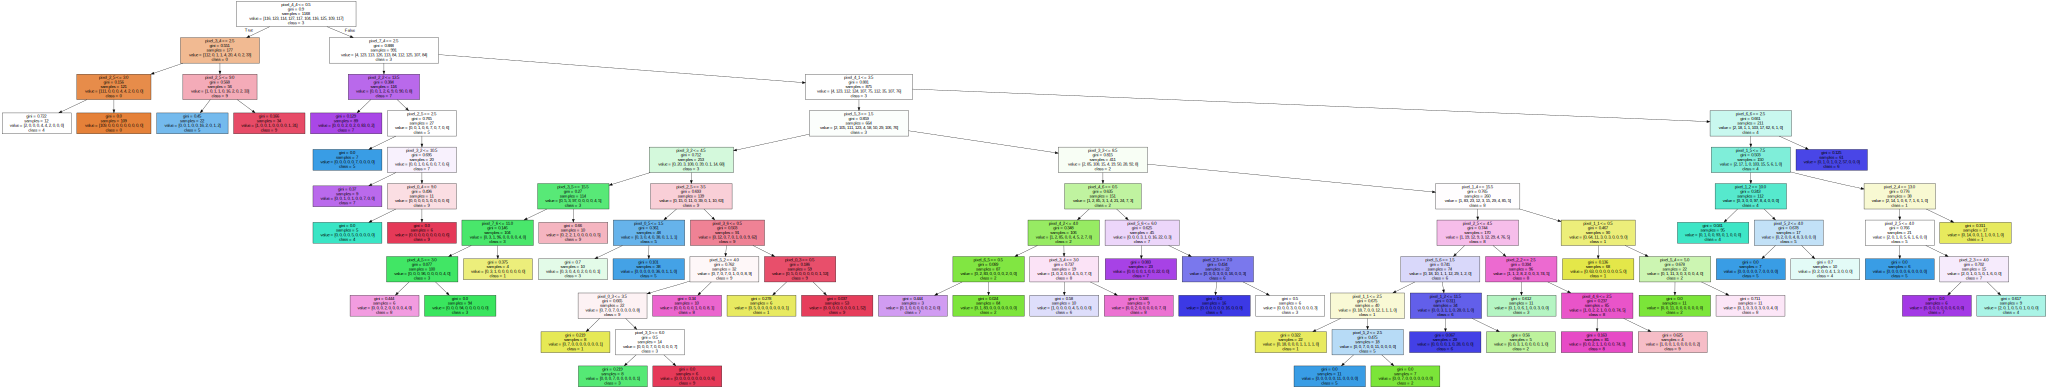

In [27]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(DT, out_file=None, 
                                feature_names=digits.feature_names,  
                                class_names=targets_names,
                                filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph

In [29]:
from sklearn.metrics import classification_report
classification_report(y_test, DT.predict(X_test), target_names=targets_names)

'              precision    recall  f1-score   support\n\n           0       0.98      0.92      0.95        62\n           1       0.78      0.86      0.82        59\n           2       0.93      0.81      0.86        63\n           3       0.81      0.79      0.80        56\n           4       0.78      0.91      0.84        64\n           5       0.88      0.74      0.81        78\n           6       0.92      0.91      0.91        65\n           7       0.86      0.91      0.88        54\n           8       0.78      0.80      0.79        65\n           9       0.81      0.89      0.85        63\n\n    accuracy                           0.85       629\n   macro avg       0.85      0.85      0.85       629\nweighted avg       0.86      0.85      0.85       629\n'

In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision_score(y_test, DT.predict(X_test),average='weighted')

0.85516676301862

In [33]:
recall_score(y_test, DT.predict(X_test),average='weighted')

0.8505564387917329